In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, log_loss, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import pyspark
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

import shap

import warnings
warnings.filterwarnings("ignore")

/home/dell-gtx/repo/tools/toolsenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.DataFrame()
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target, columns=['Target'])
#df_y.columns = ['Target']
df
df_y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df, df_y, test_size=0.5, random_state=42)
#X_test
y_test

,Target
204,1
70,0
131,0
431,1
540,1
...,...
439,1
299,1
103,1
420,1


Text(0.5, 1.0, 'Confusion Matrix')

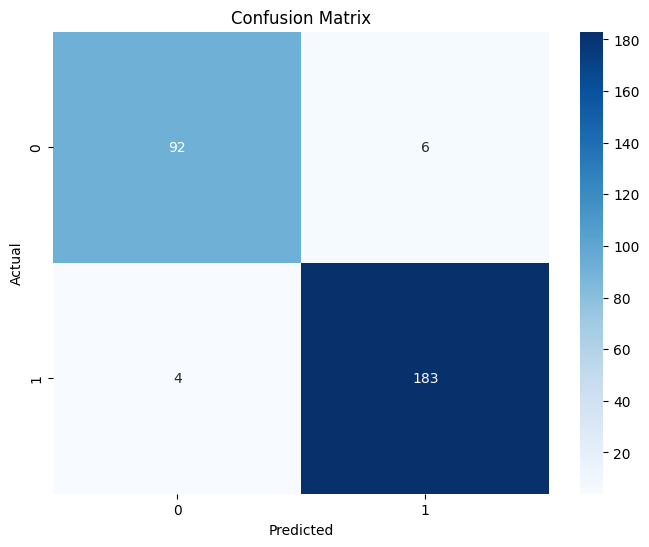

In [4]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
#print(y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
    )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 170, number of negative: 114
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2834
[LightGBM] [Info] Number of data points in the train set: 284, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.598592 -> initscore=0.399600
[LightGBM] [Info] Start training from score 0.399600
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Text(0.5, 1.0, 'Confusion Matrix')

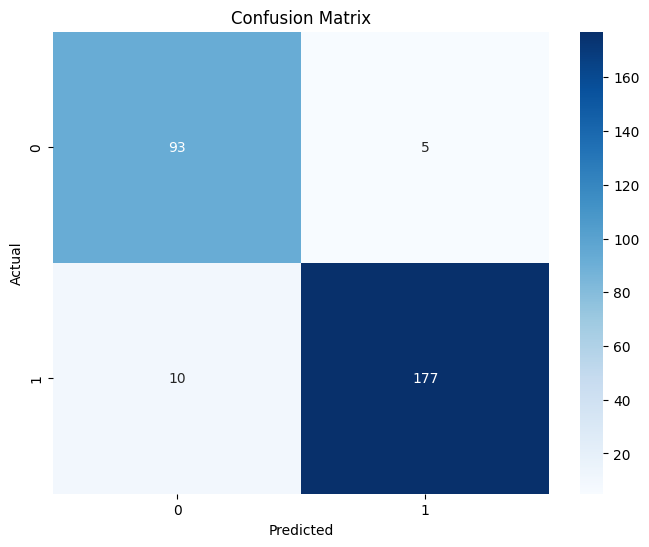

In [5]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_pred = lgbm_clf.predict(X_test)
print(y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
    )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')

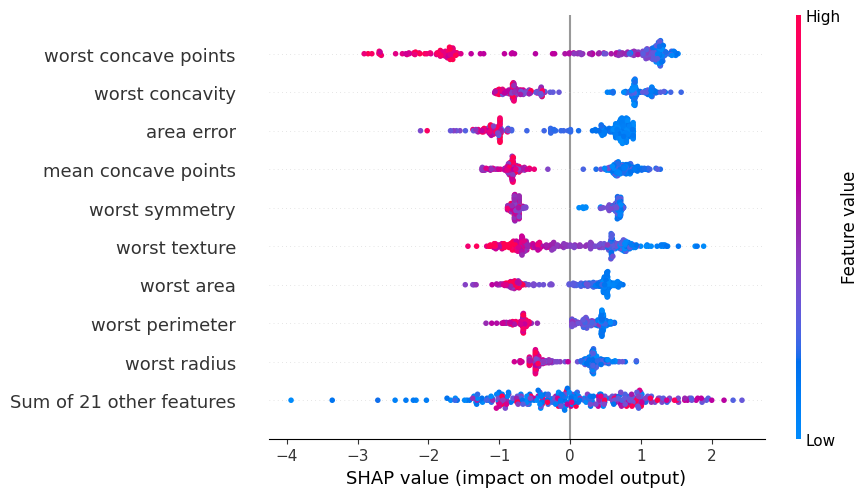

In [6]:
#shap.initjs()

explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)

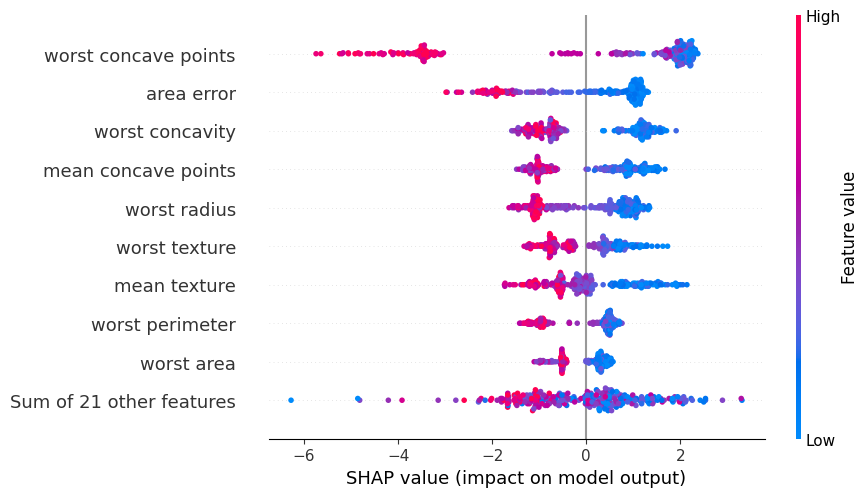

In [7]:
explainer = shap.Explainer(lgbm_clf, X_train)
shap_values = explainer(X_train)

shap.plots.beeswarm(shap_values)